In [1]:
## FCR price analysis

In [1]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for fancy plots
import numpy as np

#so that  the graphs are displayed in the Jupyter notebook
%matplotlib inline    

#to prevent warnings to be displayed
import warnings
warnings.filterwarnings('ignore')

# to increase the width of the graphs
plt.rcParams['figure.figsize']=8,4

In [3]:
# Import excel file stored in the GitHub repository folder
#df1 = pd.read_excel('/Users/silvia.donazar/GitHub_repository/fcr-price-analisys/FCR Mimer results D1&D2 01.01.2022-28.02.2024.xlsx', parse_dates=["Datetime"])

In [11]:
# Import excel file
df1 = pd.read_excel('/Users/silvia.donazar/Documents/VET/Python/Python excel files/FCR Mimer results D1&D2 01.01.2022-28.02.2024.xlsx', parse_dates=["Datetime"])

In [12]:
df1.head()

,Datetime,FCRD_upp_price_D2,Total_FCRD_upp_D2,SE1_FCRD_upp_D2,SE2_FCRD_upp_D2,SE3_FCRD_upp_D2,SE4_FCRD_upp_D2,DK2_FCRD_upp_D2,FCRD_upp_price_D1,Total_FCRD_upp_D1,SE1_FCRD_upp_D1,SE2_FCRD_upp_D1,SE3_FCRD_upp_D1,SE4_FCRD_upp_D1,DK2_FCRD_upp_D1
0,2022-01-01 00:00:00,49.18715,453.3,260.2,145.5,11.8,3.4,32.4,1.95478,16.1,5.8,10.3,0.0,0.0,0.0
1,2022-01-01 01:00:00,49.33709,451.8,260.1,145.5,11.7,3.4,31.1,1.95492,5.9,5.9,0.0,0.0,0.0,0.0
2,2022-01-01 02:00:00,49.71026,459.3,275.6,145.5,11.7,3.4,23.1,1.96262,6.1,6.1,0.0,0.0,0.0,0.0
3,2022-01-01 03:00:00,49.45940,450.1,275.7,136.5,11.4,3.4,23.1,1.96222,6.3,6.3,0.0,0.0,0.0,0.0
4,2022-01-01 04:00:00,49.52272,450.7,276.3,136.5,11.4,3.4,23.1,1.95644,4.5,4.5,0.0,0.0,0.0,0.0


In [13]:
df1["Datetime"].max()-df1["Datetime"].min()

Timedelta('788 days 23:00:00')

In [14]:
#Define Datetime as index - this enables correct x-axis visualisation and use of "resample" function
#Note: it is necessary to reload original excel file and remove the index to use "groupby" function though
df1.set_index('Datetime', inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18936 entries, 2022-01-01 00:00:00 to 2024-02-28 23:00:00
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FCRD_upp_price_D2  18936 non-null  float64
 1   Total_FCRD_upp_D2  18936 non-null  float64
 2   SE1_FCRD_upp_D2    18936 non-null  float64
 3   SE2_FCRD_upp_D2    18936 non-null  float64
 4   SE3_FCRD_upp_D2    18936 non-null  float64
 5   SE4_FCRD_upp_D2    18936 non-null  float64
 6   DK2_FCRD_upp_D2    18936 non-null  float64
 7   FCRD_upp_price_D1  18936 non-null  float64
 8   Total_FCRD_upp_D1  18936 non-null  float64
 9   SE1_FCRD_upp_D1    18936 non-null  float64
 10  SE2_FCRD_upp_D1    18936 non-null  float64
 11  SE3_FCRD_upp_D1    18936 non-null  float64
 12  SE4_FCRD_upp_D1    18936 non-null  float64
 13  DK2_FCRD_upp_D1    18936 non-null  float64
dtypes: float64(14)
memory usage: 2.2 MB


# Volumes

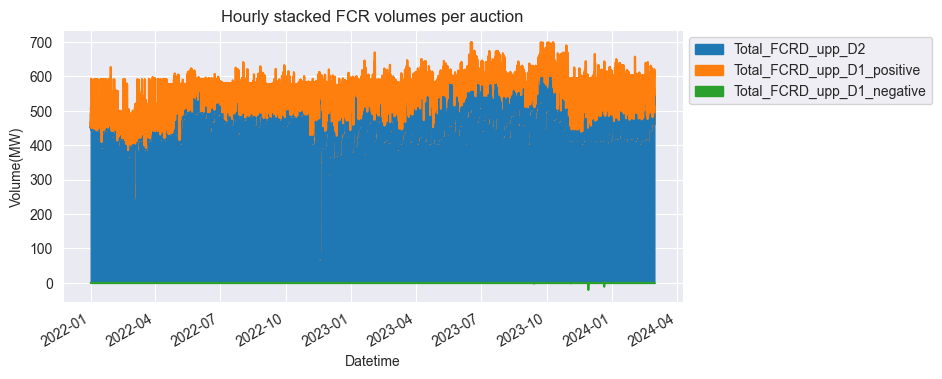

In [15]:
# Stacked volumes

# to use plot.area() it is necessary to split positive and negative values
# D1 contains negative values that are buy-backs
D1_boolean=df1['Total_FCRD_upp_D1'] >= 0 #this is true if Vol_D1>=0
df1['Total_FCRD_upp_D1_positive']=D1_boolean * df1['Total_FCRD_upp_D1']
df1['Total_FCRD_upp_D1_negative']=(~D1_boolean) * df1['Total_FCRD_upp_D1']

Volumes_per_auction = df1[['Total_FCRD_upp_D2','Total_FCRD_upp_D1_positive', 'Total_FCRD_upp_D1_negative']]

sns.set_style("darkgrid") # this adds the grid
Volumes_per_auction.plot.area()
plt.title("Hourly stacked FCR volumes per auction")
plt.ylabel("Volume(MW)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

There are actually only 8 hours where D1 total volume is negative

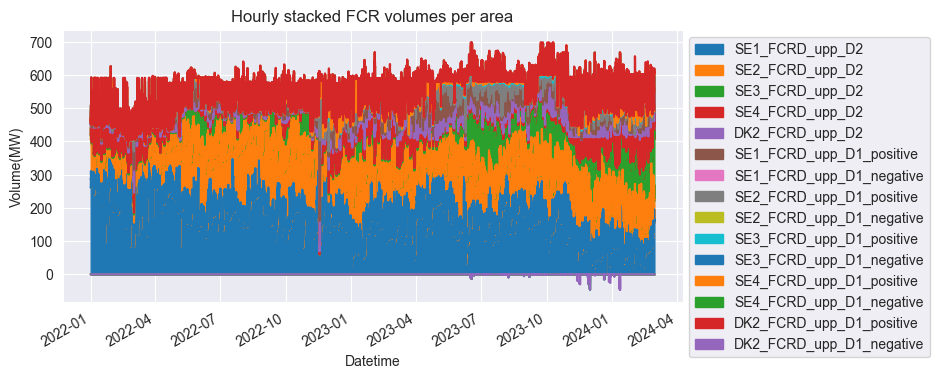

In [16]:
# Stacked volumes

# Split positive and negative values per D1_Vol_Colum to be able to plot stacked volumes
# there's surely a smarter way to code this...
D1_SE1_boolean=df1['SE1_FCRD_upp_D1'] >= 0 #this is true if Vol_D1>=0
df1['SE1_FCRD_upp_D1_positive']=D1_SE1_boolean * df1['SE1_FCRD_upp_D1']
df1['SE1_FCRD_upp_D1_negative']=(~D1_SE1_boolean) * df1['SE1_FCRD_upp_D1']
D1_SE2_boolean=df1['SE2_FCRD_upp_D1'] >= 0 #this is true if Vol_D1>=0
df1['SE2_FCRD_upp_D1_positive']=D1_SE2_boolean * df1['SE2_FCRD_upp_D1']
df1['SE2_FCRD_upp_D1_negative']=(~D1_SE2_boolean) * df1['SE2_FCRD_upp_D1']
D1_SE3_boolean=df1['SE3_FCRD_upp_D1'] >= 0 #this is true if Vol_D1>=0
df1['SE3_FCRD_upp_D1_positive']=D1_SE3_boolean * df1['SE3_FCRD_upp_D1']
df1['SE3_FCRD_upp_D1_negative']=(~D1_SE3_boolean) * df1['SE3_FCRD_upp_D1']
D1_SE4_boolean=df1['SE4_FCRD_upp_D1'] >= 0 #this is true if Vol_D1>=0
df1['SE4_FCRD_upp_D1_positive']=D1_SE4_boolean * df1['SE4_FCRD_upp_D1']
df1['SE4_FCRD_upp_D1_negative']=(~D1_SE4_boolean) * df1['SE4_FCRD_upp_D1']
D1_DK2_boolean=df1['DK2_FCRD_upp_D1'] >= 0 #this is true if Vol_D1>=0
df1['DK2_FCRD_upp_D1_positive']=D1_DK2_boolean * df1['DK2_FCRD_upp_D1']
df1['DK2_FCRD_upp_D1_negative']=(~D1_DK2_boolean) * df1['DK2_FCRD_upp_D1']

Volumes_per_area_pos_neg = df1[['SE1_FCRD_upp_D2','SE2_FCRD_upp_D2','SE3_FCRD_upp_D2', 'SE4_FCRD_upp_D2','DK2_FCRD_upp_D2','SE1_FCRD_upp_D1_positive', 'SE1_FCRD_upp_D1_negative', 'SE2_FCRD_upp_D1_positive', 'SE2_FCRD_upp_D1_negative','SE3_FCRD_upp_D1_positive', 'SE3_FCRD_upp_D1_negative', 'SE4_FCRD_upp_D1_positive', 'SE4_FCRD_upp_D1_negative', 'DK2_FCRD_upp_D1_positive', 'DK2_FCRD_upp_D1_negative']]

Volumes_per_area_pos_neg.plot.area()
plt.title("Hourly stacked FCR volumes per area")
plt.ylabel("Volume(MW)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

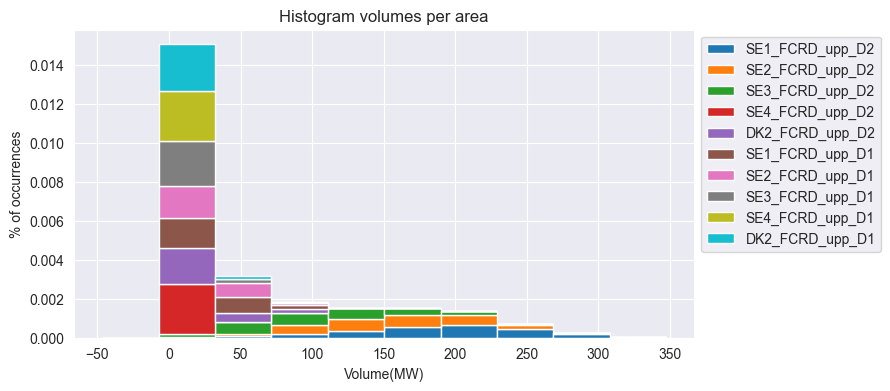

In [17]:
#Histogram
Volumes_per_area = df1[['SE1_FCRD_upp_D2', 'SE2_FCRD_upp_D2', 'SE3_FCRD_upp_D2', 'SE4_FCRD_upp_D2', 'DK2_FCRD_upp_D2', 'SE1_FCRD_upp_D1', 'SE2_FCRD_upp_D1', 'SE3_FCRD_upp_D1', 'SE4_FCRD_upp_D1', 'DK2_FCRD_upp_D1']]

plt.hist(Volumes_per_area, label=["SE1_FCRD_upp_D2","SE2_FCRD_upp_D2","SE3_FCRD_upp_D2", "SE4_FCRD_upp_D2","DK2_FCRD_upp_D2","SE1_FCRD_upp_D1", "SE2_FCRD_upp_D1","SE3_FCRD_upp_D1", "SE4_FCRD_upp_D1", "DK2_FCRD_upp_D1"], density=True, histtype='bar', stacked=True)
plt.title("Histogram volumes per area")
plt.ylabel("% of occurrences")
plt.xlabel("Volume(MW)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

Per auction: the largest volumes are procured in D2. 
Per area: from largest to smallest provided volumes: SE1, SE2, SE3, SE4.

# Prices

In [18]:
# Add column Delta_price_D2_D1 = price_D2-price_D1
Delta_price_D1_D2 =df1.FCRD_upp_price_D1 - df1.FCRD_upp_price_D2
df1['Delta_price_D1_D2'] = Delta_price_D1_D2

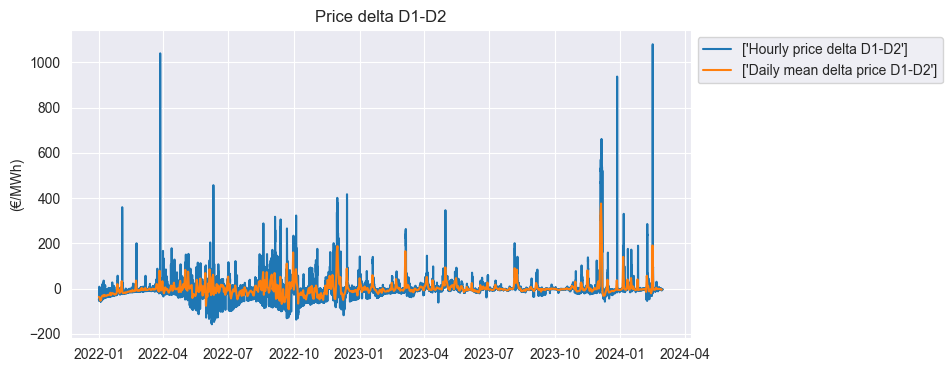

In [19]:
#plot hourly Delta

#plt.plot(df1['Delta_price_D1_D2'], c='Orange', ls='--', ms=5, label=columns[0])
plt.plot(df1['Delta_price_D1_D2'], label= ["Hourly price delta D1-D2"])
prices_delta_mean_d = df1['Delta_price_D1_D2'].resample('D').mean()
plt.plot(prices_delta_mean_d, label= ["Daily mean delta price D1-D2"])

plt.title("Price delta D1-D2")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1)) #upper left corner of the legend 1right + 1up
# xlabel="€", ylabel="Date"
plt.show()

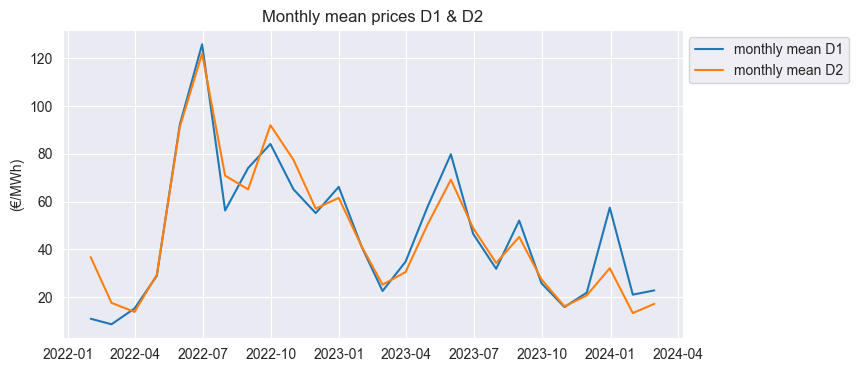

In [20]:
# plot monthly mean values for each auction D1 & D2
# Create New DataFrame Using Multiple Columns from Old DataFrame
prices= df1[['FCRD_upp_price_D1', 'FCRD_upp_price_D2']].copy()

#Monthly avg prices
prices_mean_m = prices.resample('M').mean()
plt.plot(prices_mean_m, label= ["monthly mean D1", "monthly mean D2"])

plt.title("Monthly mean prices D1 & D2")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))#(["daily", "monthly"], loc='upper left')
plt.show()

Prices have been dropping over time.<br> Since 2023 D1 prices are higher than D2's. Specially in Jan2023

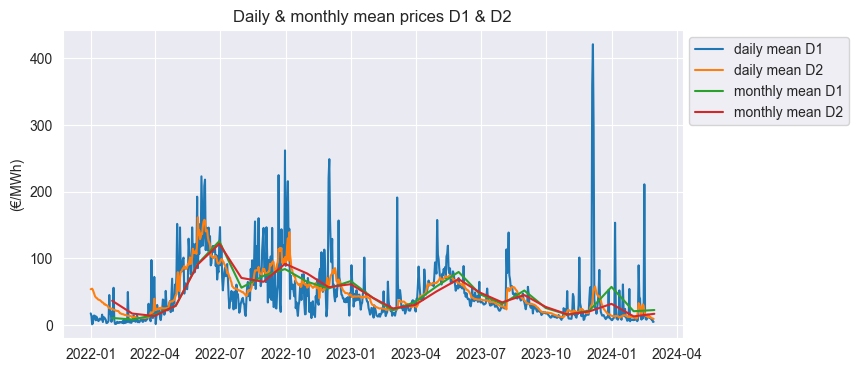

In [21]:
# plot daily mean values for each auction D1 & D2
# Create New DataFrame Using Multiple Columns from Old DataFrame
prices= df1[['FCRD_upp_price_D1', 'FCRD_upp_price_D2']].copy()

prices_mean_d = prices.resample('D').agg(['mean'])
plt.plot(prices_mean_d, label=["daily mean D1", "daily mean D2"])

#Monthly avg prices
prices_mean_m = prices.resample('M').mean()
plt.plot(prices_mean_m, label= ["monthly mean D1", "monthly mean D2"])

plt.title("Daily & monthly mean prices D1 & D2")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))#(["daily", "monthly"], loc='upper left')
plt.show()

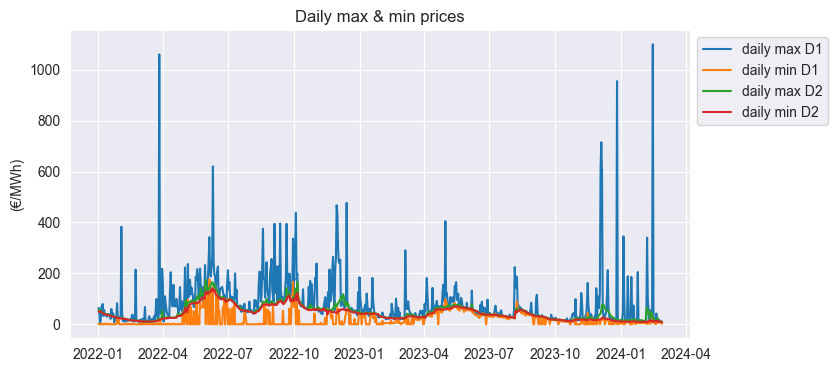

In [22]:
# plot max/ min of every 24 hours for each auction D1 & D2 for the whole timeframe

prices_maxmin_d = prices.resample('D').agg(['max', 'min'])
plt.plot(prices_maxmin_d, label=["daily max D1", "daily min D1", "daily max D2", "daily min D2"])

plt.title("Daily max & min prices")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))#(["mean", "min", "max"], loc='upper left')
plt.show()

D1 higher volatility whithin-day. <br> Since 2023 clearly more upward than downward potential D1. <br>
D2 less volatile, lower risk.

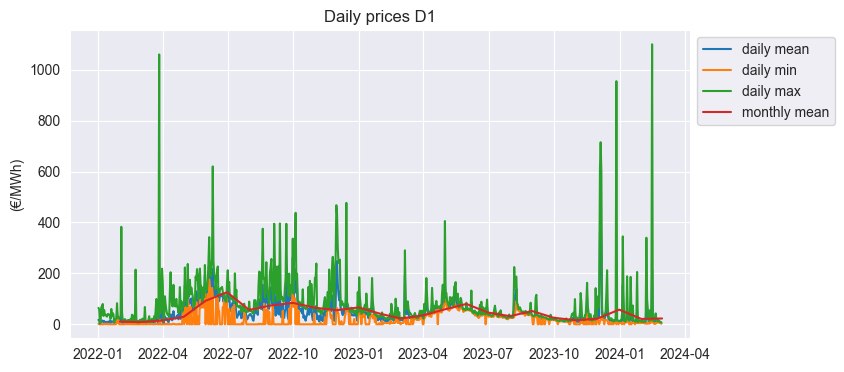

In [23]:
# plot daily max/ min for D1 for the whole timeframe

df1_prices_d = df1['FCRD_upp_price_D1'].resample('D').agg(['mean', 'min', 'max'])
plt.plot(df1_prices_d, label=["daily mean", "daily min", "daily max"])

#Monthly avg prices
df1_prices_mean_m = df1['FCRD_upp_price_D1'].resample('M').mean()
plt.plot(df1_prices_mean_m, label= "monthly mean")

plt.title("Daily prices D1")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))#(["mean", "min", "max"], loc='upper left')
plt.show()

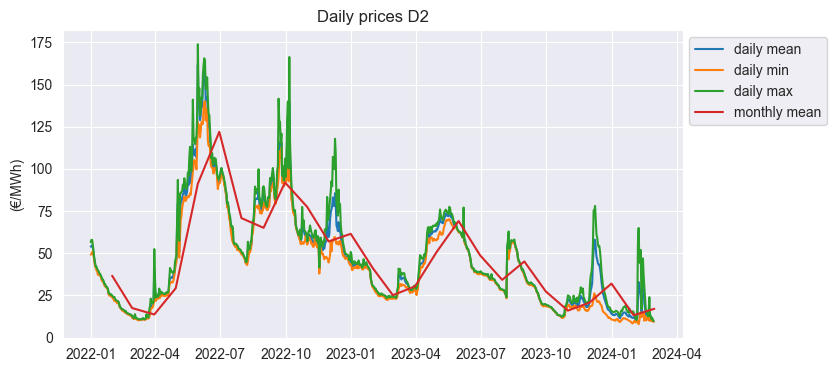

In [24]:
# plot daily max/ min for D2 for the whole timeframe

df1_prices_d = df1['FCRD_upp_price_D2'].resample('D').agg(['mean', 'min', 'max'])
plt.plot(df1_prices_d, label=["daily mean", "daily min", "daily max"])

#Monthly avg prices
df1_prices_mean_m = df1['FCRD_upp_price_D2'].resample('M').mean()
plt.plot(df1_prices_mean_m, label= "monthly mean")

plt.title("Daily prices D2")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))#(["mean", "min", "max"], loc='upper left')
plt.show()

## Prices grouped by hours/ days/ month

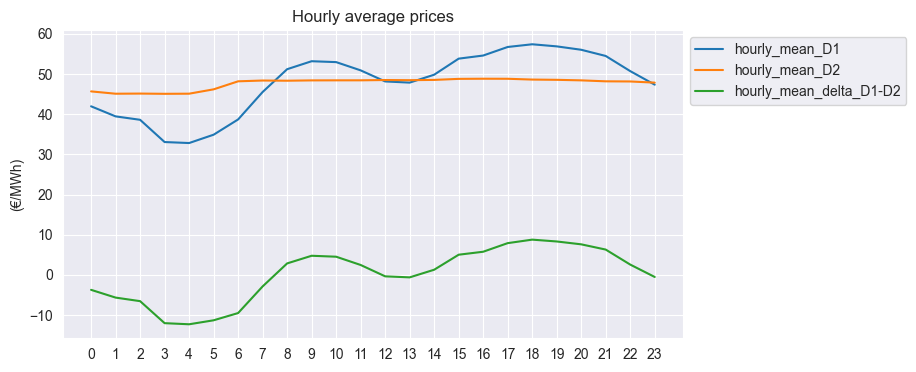

In [25]:
# Need to restore Datetime as a column instead of index to use groupby function
df1 = pd.read_excel('/Users/silvia.donazar/Documents/VET/Python/Python excel files/FCR Mimer results D1&D2 01.01.2022-31.01.2024.xlsx', parse_dates=["Datetime"])

# Again add column Delta_price_D2_D1 = price_D2-price_D1
df1['Delta_price_D1_D2']=df1.FCRD_upp_price_D1 - df1.FCRD_upp_price_D2

# https://pandas.pydata.org/docs/dev/getting_started/intro_tutorials/09_timeseries.html
hourly_mean_D1=df1.groupby([df1["Datetime"].dt.hour])["FCRD_upp_price_D1"].mean()
hourly_mean_D2=df1.groupby([df1["Datetime"].dt.hour])["FCRD_upp_price_D2"].mean()
hourly_mean_delta_D1_D2=df1.groupby([df1["Datetime"].dt.hour])["Delta_price_D1_D2"].mean()

plt.plot(hourly_mean_D1, label='hourly_mean_D1')
plt.plot(hourly_mean_D2, label='hourly_mean_D2')
plt.plot(hourly_mean_delta_D1_D2, label='hourly_mean_delta_D1-D2')

plt.title("Hourly average prices")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1)) #upper left corner of the legend 1right + 1up
plt.xticks(np.arange(0, 24, 1))
plt.show()

D2 10€ higher prices in average between H0-H9; for the rest of the day D2 between 5-10€ lower than D1;

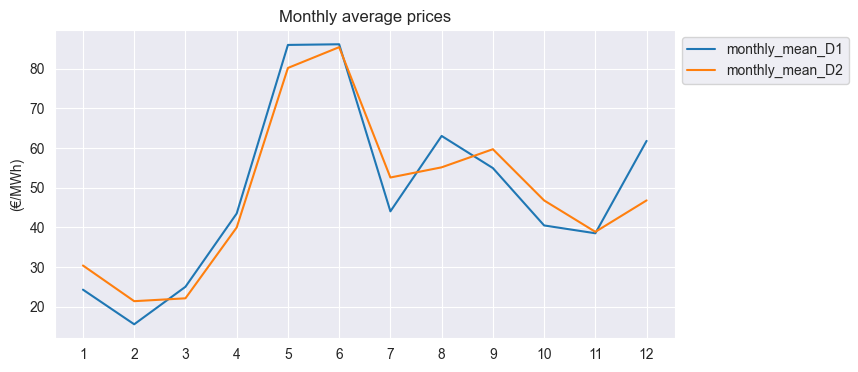

In [30]:
# What is the monthly average price for each auction D1 & D2?
monthly_mean_D1=df1.groupby([df1["Datetime"].dt.month])["FCRD_upp_price_D1"].mean()
monthly_mean_D2=df1.groupby([df1["Datetime"].dt.month])["FCRD_upp_price_D2"].mean()


plt.plot(monthly_mean_D1, label='monthly_mean_D1')
plt.plot(monthly_mean_D2, label='monthly_mean_D2')

plt.title("Monthly average prices")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1)) #upper left corner of the legend 1right + 1up
plt.xticks(np.arange(1, 13, 1))
plt.show()

D2 mean has been significantly higher in December, but could be just coincidence given that we are looking only 2 years back.

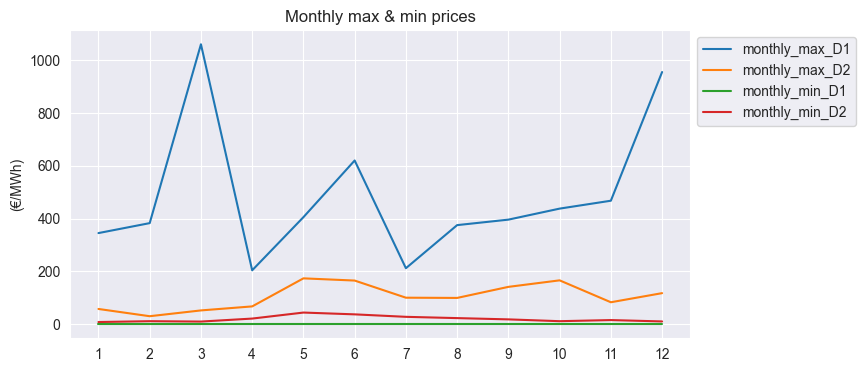

In [27]:
# What is the monthly average price for each auction D1 & D2?
monthly_max_D1=df1.groupby([df1["Datetime"].dt.month])["FCRD_upp_price_D1"].max()
monthly_max_D2=df1.groupby([df1["Datetime"].dt.month])["FCRD_upp_price_D2"].max()
monthly_min_D1=df1.groupby([df1["Datetime"].dt.month])["FCRD_upp_price_D1"].min()
monthly_min_D2=df1.groupby([df1["Datetime"].dt.month])["FCRD_upp_price_D2"].min()

plt.plot(monthly_max_D1, label='monthly_max_D1')
plt.plot(monthly_max_D2, label='monthly_max_D2')
plt.plot(monthly_min_D1, label='monthly_min_D1')
plt.plot(monthly_min_D2, label='monthly_min_D2')

plt.title("Monthly max & min prices")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1)) #upper left corner of the legend 1right + 1up
plt.xticks(np.arange(1, 13, 1))
plt.show()

# Observations

Observations: <br> 
- Prices have been dropping over time.
Since 2023 D1 prices are higher than D2's. Specially in Jan2024 <br> 
- D1 higher volatility whithin-day.
Since 2023 clearly more upward than downward potential D1.
D2 less volatile, lower risk. <br> 
- D2 10€ higher prices in average between H0-H9; for the rest of the day D2 between 5-10€ lower than D1;<br>
- D2 mean monthly price has been 12€ higher in December but could be just coincidence given that we are looking only 2 years back.
Monthly max prices (around 1000€) took place on March and December; reason still to investigate 

# Backtesting

Idea: baktest the additional profit from strategy b) against strategy a): <br> a) lock as much volume as possible in D2 <br> b) bid D2 between H0-H9 and the rest D1. <br> Assumption: we are granted all offered volumes

Note: <br> The volumes we bid are calculated as 70% of the 5% percentile of the last two months; the 70% stems from our FCR arrangement, where we guarantee that we always take a buffer of 30% in our volumes. We submit same volumes every day and update then once per month. 

In [236]:
List_volume_available_SE3_1day=[4.2, 4, 5.3, 4.5, 3.8, 2.4, 1.2, 0.4, 0.5, 0.4, 0.5, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.7, 0.9, 1.1, 1.7, 3]
List_volume_available_SE4_1day=[1.5, 1.6, 2.2, 2, 1.3, 0.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6, 1.1]

In [237]:
# Import excel file
df1 = pd.read_excel('/Users/silvia.donazar/Documents/VET/Python/Python excel files/FCR Mimer results D1&D2 01.01.2022-28.02.2024.xlsx', parse_dates=["Datetime"])
df1["Datetime"].max()-df1["Datetime"].min() #need to add 1 day

Timedelta('788 days 23:00:00')

In [238]:
#create dataframe by repeated values from a list # 761 days until 31.01.2023 # 789 days until 28.02.2024
df1['Volume_bid_SE3'] = pd.DataFrame({'Volume_bid_SE3':np.tile(List_volume_available_SE3_1day, 789)})
df1['Volume_bid_SE4'] = pd.DataFrame({'Volume_bid_SE3':np.tile(List_volume_available_SE4_1day, 789)})

#Add price delta as a column too
df1['Delta_price_D1_D2'] = df1.FCRD_upp_price_D1 - df1.FCRD_upp_price_D2

#Check that the volume_available matches the right hours
# df1['Volume_bid_SE3'].tail(24) # correct
# df1['Volume_bid_SE4'].tail(24)

In [239]:
# the added profit with strategy b) equals volumes *(price_delta_D1-D2) for H10-H24
# create boolean: if H>=10, True
df1['range_H10_H24'] = df1['Datetime'].dt.hour >=9 # it must be 9 and not 10 because it starts by 0 !
df1['range_H10_H24'].head(24) # looks correct

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
Name: range_H10_H24, dtype: bool

In [240]:
df1['extra_profit_SE3_10'] = df1['Volume_bid_SE3'] * df1['Delta_price_D1_D2']*df1['range_H10_H24']
df1['extra_profit_SE4_10'] = df1['Volume_bid_SE4'] * df1['Delta_price_D1_D2']*df1['range_H10_H24']

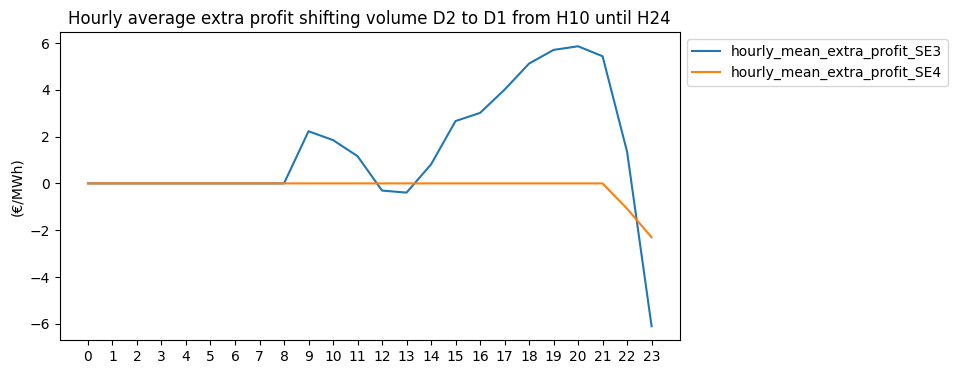

In [242]:
# Plot additional profit grouped per hour

hourly_mean_extra_profit_SE3=df1.groupby([df1["Datetime"].dt.hour])["extra_profit_SE3_10"].mean()
hourly_mean_extra_profit_SE4=df1.groupby([df1["Datetime"].dt.hour])["extra_profit_SE4_10"].mean()

plt.plot(hourly_mean_extra_profit_SE3, label='hourly_mean_extra_profit_SE3')
plt.plot(hourly_mean_extra_profit_SE4, label='hourly_mean_extra_profit_SE4')

plt.title("Hourly average extra profit shifting volume D2 to D1 from H10 until H24")
plt.ylabel("(€/MWh)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1)) #upper left corner of the legend 1right + 1up
plt.xticks(np.arange(0, 24, 1))
plt.show()

It is better to just shift the volumes contained whithin H10<= HH <=H22

## Same but only shifting the volumes contained within H10<= HH <=H22

In [232]:
# lets just shift the volumes contained in H10<= HH <=H22
df1['range_H10_H22'] = (df1['Datetime'].dt.hour>=9) & (df1['Datetime'].dt.hour<=21) # it must be 9 and 21 because it starts by 0 !

df1['extra_profit_SE3_10_22'] = df1['Volume_bid_SE3'] * df1['Delta_price_D1_D2']*df1['range_H10_H22']
df1['extra_profit_SE4_10_22'] = df1['Volume_bid_SE4'] * df1['Delta_price_D1_D2']*df1['range_H10_H22']

df1['range_H10_H22'].head(24) # looks correct

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22    False
23    False
Name: range_H10_H22, dtype: bool

In [233]:
df1.set_index('Datetime', inplace=True) # for correct plotting of Datetime with cunsum().plot()

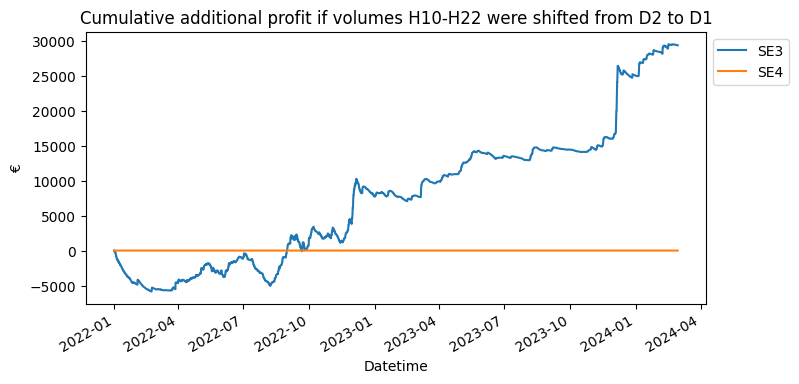

 
 Additional profit: 
 SE3=29323.07€ 
 SE4=0.00€ 


In [234]:
df1['extra_profit_SE3_10_22'].cumsum().plot()
df1['extra_profit_SE4_10_22'].cumsum().plot()

plt.title("Cumulative additional profit if volumes H10-H22 were shifted from D2 to D1")
plt.ylabel("€")
plt.legend(["SE3", "SE4"],loc='upper left', bbox_to_anchor=(1,1))
plt.show()
print(f" \n Additional profit: \n SE3={sum(df1['extra_profit_SE3_10_22']):.2f}€ \n SE4={sum(df1['extra_profit_SE4_10_22']):.2f}€ ")

### Same backtesting for February 2024

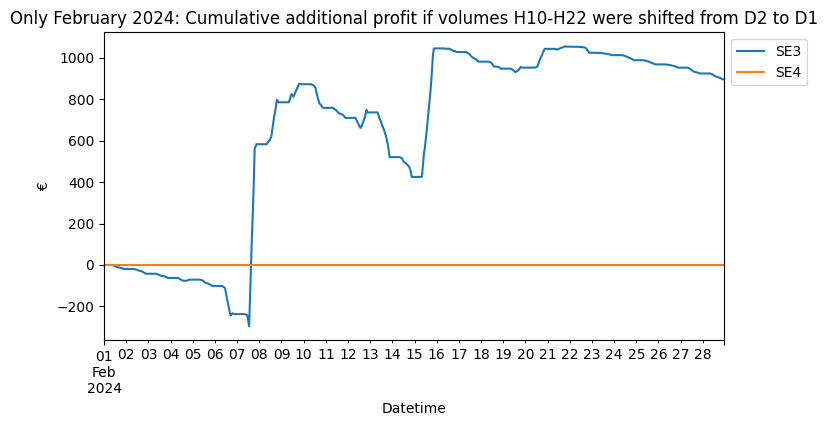

 
 Additional profit: 
 SE3=895.43€ 
 SE4=0.00€ 


In [235]:
df2=df1['2024-02-01 00:00:00':] #new dataframe from 01.02.2024

df2['extra_profit_SE3_10_22'].cumsum().plot()
df2['extra_profit_SE4_10_22'].cumsum().plot()

plt.title("Only February 2024: Cumulative additional profit if volumes H10-H22 were shifted from D2 to D1")
plt.ylabel("€")
plt.legend(["SE3", "SE4"],loc='upper left', bbox_to_anchor=(1,1))
plt.show()

print(f" \n Additional profit: \n SE3={sum(df2['extra_profit_SE3_10_22']):.2f}€ \n SE4={sum(df2['extra_profit_SE4_10_22']):.2f}€ ")

## Next: Correlation between D1 spikes, total FCR volume D2 (< 602MW) (and hydro situation + spot prices)

- Plot spot prices